In [334]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [335]:
data = pd.read_csv("tested.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [336]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [337]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


## Droping the unnessesary columns 

In [338]:
columns = ["Cabin","Name", "Ticket","PassengerId"]
data = data.drop(columns , axis=1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


## Analysing the data 

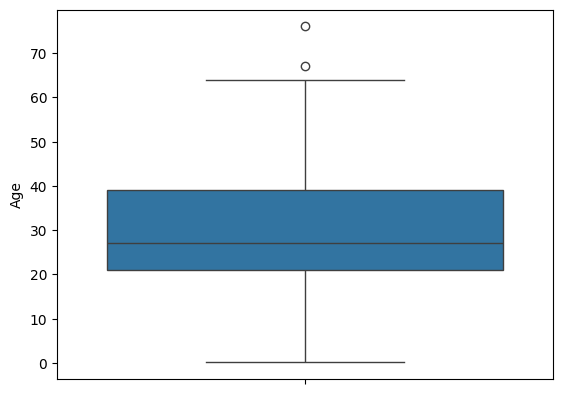

In [339]:
sns.boxplot(y=data["Age"])
plt.show()

In [340]:
data["Age"].value_counts()

Age
21.0    17
24.0    17
22.0    16
30.0    15
18.0    13
        ..
76.0     1
28.5     1
22.5     1
62.0     1
38.5     1
Name: count, Length: 79, dtype: int64

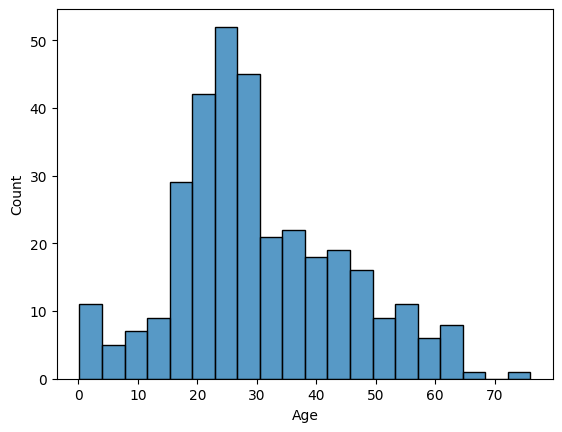

In [341]:
sns.histplot(data['Age'], bins=20)
plt.show()

In [342]:
data["Age"].mean()

30.272590361445783

In [343]:
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data["Embarked"] = le.fit_transform(data["Embarked"])
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,7.8292,1
1,1,3,0,47.0,1,0,7.0000,2
2,0,2,1,62.0,0,0,9.6875,1
3,0,3,1,27.0,0,0,8.6625,2
4,1,3,0,22.0,1,1,12.2875,2


## C =0 , Q =1 , S =2

In [344]:
corr_data = data.corr()
correlation = corr_data['Survived'].sort_values(ascending = False )
correlation

Survived    1.000000
Fare        0.191514
Parch       0.159120
SibSp       0.099943
Age        -0.000013
Embarked   -0.076281
Pclass     -0.108615
Sex        -1.000000
Name: Survived, dtype: float64

In [345]:
mode_value = data['Age'].mode().iloc[0]
mode_value

21.0

In [346]:
data['Age'] = data['Age'].fillna(mode_value)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,7.8292,1
1,1,3,0,47.0,1,0,7.0000,2
2,0,2,1,62.0,0,0,9.6875,1
3,0,3,1,27.0,0,0,8.6625,2
4,1,3,0,22.0,1,1,12.2875,2


In [347]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    int32  
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      417 non-null    float64
 7   Embarked  418 non-null    int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 23.0 KB


In [348]:
data.dropna(inplace=True)

In [349]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  417 non-null    int64  
 1   Pclass    417 non-null    int64  
 2   Sex       417 non-null    int32  
 3   Age       417 non-null    float64
 4   SibSp     417 non-null    int64  
 5   Parch     417 non-null    int64  
 6   Fare      417 non-null    float64
 7   Embarked  417 non-null    int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 26.1 KB


## Split the data 

In [350]:
x = data.iloc[:, 1:]
y = data.iloc[:, 0]

x, y

(     Pclass  Sex   Age  SibSp  Parch      Fare  Embarked
 0         3    1  34.5      0      0    7.8292         1
 1         3    0  47.0      1      0    7.0000         2
 2         2    1  62.0      0      0    9.6875         1
 3         3    1  27.0      0      0    8.6625         2
 4         3    0  22.0      1      1   12.2875         2
 ..      ...  ...   ...    ...    ...       ...       ...
 413       3    1  21.0      0      0    8.0500         2
 414       1    0  39.0      0      0  108.9000         0
 415       3    1  38.5      0      0    7.2500         2
 416       3    1  21.0      0      0    8.0500         2
 417       3    1  21.0      1      1   22.3583         0
 
 [417 rows x 7 columns],
 0      0
 1      1
 2      0
 3      0
 4      1
       ..
 413    0
 414    1
 415    0
 416    0
 417    0
 Name: Survived, Length: 417, dtype: int64)

In [351]:
x.shape, y.shape

((417, 7), (417,))

In [352]:
x_train, x_test, y_train, y_test  = train_test_split(x, y  , test_size = 0.2 , random_state  = 46)
x_train.shape, x_test.shape

((333, 7), (84, 7))

## Implementing K-neigherest-neighbors 

In [353]:
knn = KNeighborsClassifier(n_neighbors=5, weights='distance', p=2)

In [354]:
knn.fit(x_train, y_train)

KNeighborsClassifier(weights='distance')

In [355]:
y_pred = knn.predict(x_test)

z = np.vstack((y_pred, y_test))
pd.DataFrame(z)


,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,83
0,1,0,1,0,1,0,1,0,0,1,...,0,0,1,0,0,0,1,1,0,0
1,0,0,0,0,1,0,1,0,1,1,...,1,0,1,1,1,0,0,1,0,1


In [356]:
accuracy_score(y_pred, y_test)

0.6547619047619048

## Implementing Naive Bayes

In [357]:
from sklearn.naive_bayes import GaussianNB
naive_model = GaussianNB()

In [358]:
naive_model.fit(x_train, y_train)

GaussianNB()

In [359]:
y_pred = naive_model.predict(x_test)

In [360]:
pd.DataFrame(np.vstack((y_pred, y_test)))

,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,83
0,0,0,0,0,1,0,1,0,1,1,...,1,0,1,1,1,0,0,1,0,1
1,0,0,0,0,1,0,1,0,1,1,...,1,0,1,1,1,0,0,1,0,1


In [361]:
accuracy_score(y_pred, y_test)

1.0

## Implementing Decision Tree

In [362]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

In [363]:
tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [364]:
y_pred = tree.predict(x_test)

In [365]:
pd.DataFrame(np.vstack((y_pred, y_test)))

,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,83
0,0,0,0,0,1,0,1,0,1,1,...,1,0,1,1,1,0,0,1,0,1
1,0,0,0,0,1,0,1,0,1,1,...,1,0,1,1,1,0,0,1,0,1


In [366]:
accuracy_score(y_pred, y_test)

1.0

## Implementing Random Forest

In [367]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()

In [368]:
forest.fit(x_train, y_train)

RandomForestClassifier()

In [369]:
y_pred = forest.predict(x_test)

z = np.vstack((y_pred, y_test))
pd.DataFrame(z)

,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,83
0,0,0,0,0,1,0,1,0,1,1,...,1,0,1,1,1,0,0,1,0,1
1,0,0,0,0,1,0,1,0,1,1,...,1,0,1,1,1,0,0,1,0,1


In [370]:
accuracy_score(y_pred, y_test)

1.0